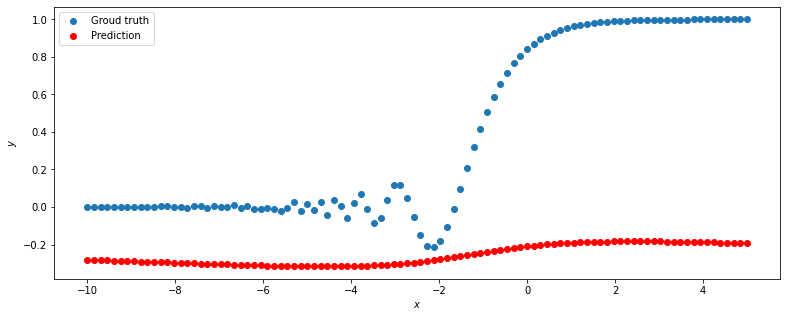

In [ ]:
##
import torch 
import matplotlib.pyplot as plt
##

##
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
##


#
def  target_function(x):
       return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------



##
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(16)
##


##
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)
##




0.025675229728221893


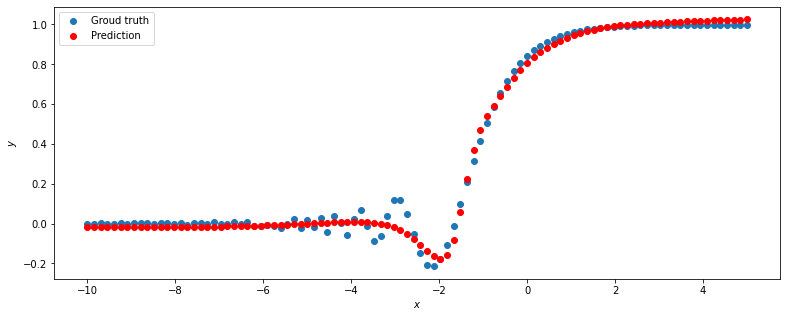

In [ ]:
##
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.002)
##

#test_accuracy_history = []
#test_loss_history = []

##
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()
##

##
def metric(pred, target):
        return (pred - target).abs().mean()
##

##
for epoch_index in range(6000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

#   test_preds = sine_net.forward(x_validation)
#   test_loss_history.append(loss(test_preds, y_validation))

predict(sine_net, x_validation, y_validation)
print(metric(sine_net.forward(x_validation), y_validation).item())
##


##
#plt.plot(test_loss_history);
##
